In [27]:
import functools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [4]:
data = pd.read_csv('../clean_dataset.csv', sep=',', header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39050 entries, 0 to 39049
Data columns (total 43 columns):
Unnamed: 0                      39050 non-null int64
Unnamed: 0.1                    39050 non-null int64
n_tokens_title                  39050 non-null float64
n_tokens_content                39050 non-null float64
n_unique_tokens                 39050 non-null float64
n_non_stop_unique_tokens        39050 non-null float64
num_hrefs                       39050 non-null float64
num_self_hrefs                  39050 non-null float64
num_imgs                        39050 non-null float64
average_token_length            39050 non-null float64
num_keywords                    39050 non-null float64
kw_max_min                      39050 non-null float64
kw_avg_min                      39050 non-null float64
kw_min_max                      39050 non-null float64
kw_avg_max                      39050 non-null float64
kw_min_avg                      39050 non-null float64
kw_max_avg     

In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,1,1,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,2,2,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,3,3,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,4,4,13.0,1072.0,0.415646,0.540890,19.0,19.0,20.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [18]:
kw_avg_avg = []
kw_max_avg = []
self_reference_min = []
self_reference_avg = []
self_reference_max = []
LDA3 = []
for kw in data['kw_avg_avg']:
    kw_avg_avg.append(int(kw))
for kw in data['kw_max_avg']:
    kw_max_avg.append(int(kw))
for self in data['self_reference_min_shares']:
    self_reference_min.append(int(kw))
for self in data['self_reference_avg_sharess']:
    self_reference_avg.append(int(kw))
for self in data['self_reference_max_shares']:
    self_reference_max.append(int(kw))
for lda in data['LDA_03']:
    LDA3.append(int(lda * 100))

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [22]:
X = list(zip(data['kw_avg_avg'], data['LDA_03'], data['kw_max_avg'], 
        data['self_reference_avg_sharess'], data['self_reference_min_shares'], data['self_reference_max_shares']))
Y = np.array(data['shares'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

In [23]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
Y_predict = linear_regression.predict(X_test)
print(mean_squared_error(Y_predict, Y_test))
print(mean_absolute_error(Y_predict, Y_test))
print(r2_score(Y_predict, Y_test))

10404766.4241
1910.77311258
-24.9980087137


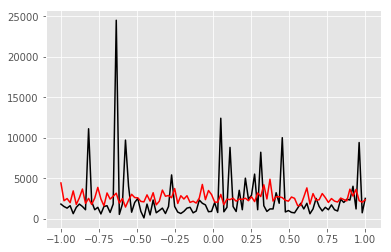

In [28]:
plt.plot(np.linspace(-1, 1, 100), Y_test[:100], label='data', color='black')
plt.plot(np.linspace(-1, 1, 100), Y_predict[:100], label='predicted', color='red')

In [30]:
X = list(zip(kw_avg_avg, kw_max_avg, self_reference_min, self_reference_max, self_reference_avg, LDA3))
Y = np.array(data['shares'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

In [31]:
linear_regression2 = LinearRegression()
linear_regression2.fit(X_train, Y_train)
Y_predict = linear_regression2.predict(X_test)
print(mean_squared_error(Y_predict, Y_test))
print(mean_absolute_error(Y_predict, Y_test))
print(r2_score(Y_predict, Y_test))

10433257.2755
1913.99709336
-25.9430221131


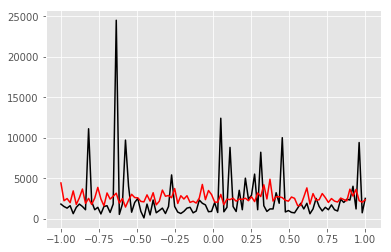

In [32]:
plt.plot(np.linspace(-1, 1, 100), Y_test[:100], label='data', color='black')
plt.plot(np.linspace(-1, 1, 100), Y_predict[:100], label='predicted', color='red')